Standard scanpy workflow

In [1]:
import scanpy as sc
import anndata
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
adata_10x = sc.read_h5ad("/nfs/team283/aa16/data/ZikaGlioblastoma/zikaGlioblastomas_10x_microglia.h5ad")
adata_SS = sc.read_h5ad("/nfs/team283/aa16/data/ZikaGlioblastoma/zikaGlioblastomas_SS_microglia.h5ad")

In [13]:
cluster_markers = np.array(('CX3CR1', 'TMEM119', 'CSF1R', 'P2RY12', 'P2RY13', 'SELPLG',
                     'MARCKS', 'TREM2', 'APOE', 'HLA-DRA', 'CD74', 'IFI44L',
                     'CCL2', 'CCL4', 'IFNB1', 'IL1B'))

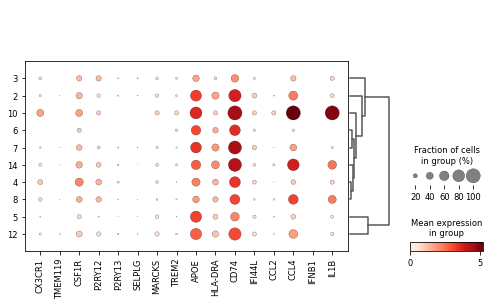

In [17]:
sc.pl.dotplot(adata_10x, cluster_markers, 'MicrogliaCluster', dendrogram=True, save='dotplot_10x')

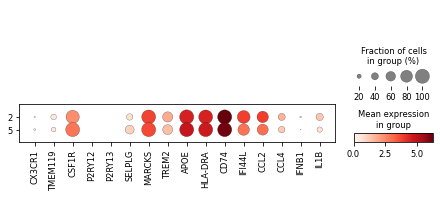

In [16]:
sc.pl.dotplot(adata_SS, cluster_markers, 'MicrogliaCluster', dendrogram=True, save = 'dotplot_SS')

/nfs/users/nfs_a/aa16/.local/lib/python3.7/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


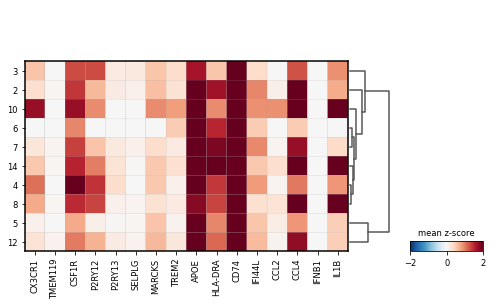

In [22]:
sc.pl.matrixplot(adata_10x, cluster_markers, 'MicrogliaCluster', dendrogram=True,
                 colorbar_title='mean z-score', vmin=-2, vmax=2, cmap='RdBu_r', save = 'matrixplot_10x')

/nfs/users/nfs_a/aa16/.local/lib/python3.7/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


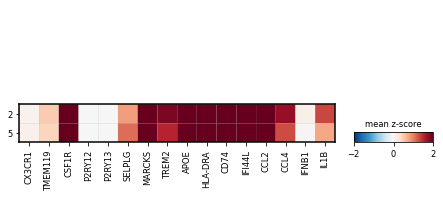

In [23]:
sc.pl.matrixplot(adata_SS, cluster_markers, 'MicrogliaCluster', dendrogram=True,
                 colorbar_title='mean z-score', vmin=-2, vmax=2, cmap='RdBu_r', save = 'matrixplot_SS')

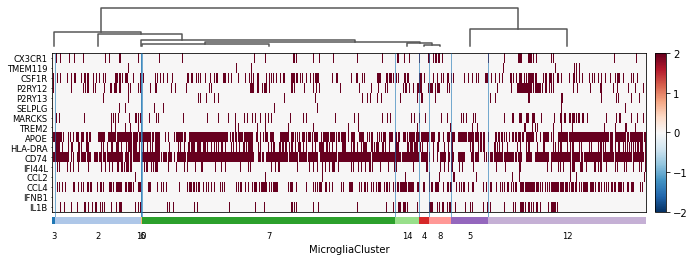

In [28]:
ax = sc.pl.heatmap(adata_10x, cluster_markers, groupby='MicrogliaCluster', save = 'heatmap_10x',
                   vmin=-2, vmax=2, cmap='RdBu_r', dendrogram=True, swap_axes=True, figsize=(11,4))

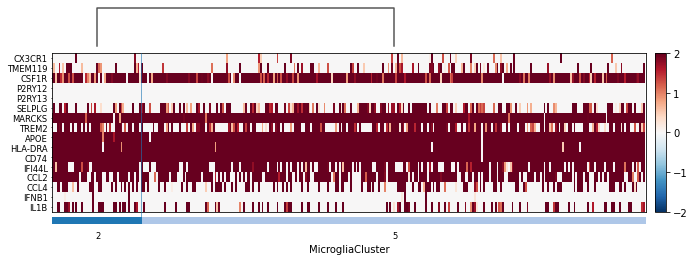

In [30]:
ax = sc.pl.heatmap(adata_SS, cluster_markers, groupby='MicrogliaCluster', save = 'heatmap_SS',
                   vmin=-2, vmax=2, cmap='RdBu_r', dendrogram=True, swap_axes=True, figsize=(11,4))

In [ ]:
    Name   Studied     Slept      Other
0    Ram  4.855064  9.639962   9.504974
1   Yash  8.625440  0.058927  15.315634
2  Alpha  3.828192  0.723199  19.448609
3   Deep  7.150955  3.899420  12.949625
4   Alex  6.477900  8.198181   9.323919
5   Jack  1.922270  1.331427  20.746303
6  Sufia  8.978216  0.993438  14.028347

In [34]:
np.unique(adata_10x.obs['Patient'])

array(['42', '43', '45', '46'], dtype=object)

In [153]:
patients = ('42', '43', '45', '46')
microglia_clusters = ['2', '3', '4', '5', '6', '7', '8', '10', '12', '14']

df_10x = pd.DataFrame(columns = ('Patient', '2', '3', '4', '5', '6', '7', '8', '10', '12', '14'))
df_10x['Patient'] = patients
for i in range(np.shape(df_10x)[0]):
    for j in range(1,np.shape(df_10x)[1]):
        df_10x.iloc[i,j] = np.sum(adata_10x.obs['MicrogliaCluster'].loc[adata_10x.obs['Patient'] == patients[i]] == microglia_clusters[j-1])/sum(adata_10x.obs['Patient'] == patients[i])

In [155]:
import matplotlib

cmap = matplotlib.cm.get_cmap('tab10')

rgba = cmap(1)

In [156]:
cmap(0.1)

(1.0, 0.36777954425013254, 0.0, 1.0)

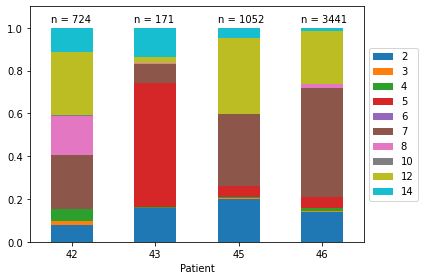

In [154]:
ax = df_10x.plot(
    x = 'Patient',
    kind = 'bar',
    stacked = True,
    mark_right = False,
    legend = False,
    color = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(4), cmap(5), cmap(6), cmap(7), cmap(8), cmap(9)])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.text(0-0.25, 1.025, 'n = ' + str(sum(adata_10x.obs['Patient'] == patients[0])))
plt.text(1-0.25, 1.025, 'n = ' + str(sum(adata_10x.obs['Patient'] == patients[1])))
plt.text(2-0.25, 1.025, 'n = ' + str(sum(adata_10x.obs['Patient'] == patients[2])))
plt.text(3-0.25, 1.025, 'n = ' + str(sum(adata_10x.obs['Patient'] == patients[3])))
plt.ylim(0,1.1)
plt.tight_layout()
plt.savefig('figures/microgliaClusters10x_stackedBarPlot.pdf')
plt.show()

In [131]:
patients = ('45', '46', '48', '50', '51', '54')
microglia_clusters = ['2', '5']

df_SS = pd.DataFrame(columns = ('Patient', '2', '5'))
df_SS['Patient'] = patients
for i in range(np.shape(df_SS)[0]):
    for j in range(1,np.shape(df_SS)[1]):
        df_SS.iloc[i,j] = np.sum(adata_SS.obs['MicrogliaCluster'].loc[adata_SS.obs['Patient'] == patients[i]] == microglia_clusters[j-1])/sum(adata_SS.obs['Patient'] == patients[i])

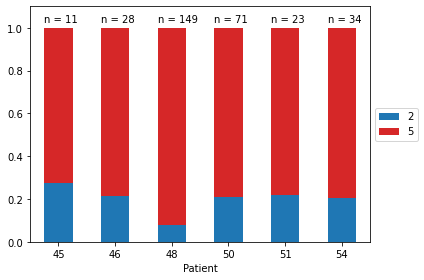

In [152]:
ax = df_SS.plot(
    x = 'Patient',
    kind = 'bar',
    stacked = True,
    mark_right = False,
    legend = False,
    color = [cmap(0), cmap(0.3)])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 0)
plt.text(0-0.25, 1.025, 'n = ' + str(sum(adata_SS.obs['Patient'] == patients[0])))
plt.text(1-0.25, 1.025, 'n = ' + str(sum(adata_SS.obs['Patient'] == patients[1])))
plt.text(2-0.25, 1.025, 'n = ' + str(sum(adata_SS.obs['Patient'] == patients[2])))
plt.text(3-0.25, 1.025, 'n = ' + str(sum(adata_SS.obs['Patient'] == patients[3])))
plt.text(4-0.25, 1.025, 'n = ' + str(sum(adata_SS.obs['Patient'] == patients[4])))
plt.text(5-0.25, 1.025, 'n = ' + str(sum(adata_SS.obs['Patient'] == patients[5])))
plt.ylim(0,1.1)
plt.tight_layout()
plt.savefig('figures/microgliaClustersSS_stackedBarPlot.pdf')
plt.show()